<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
# get matplot to show charts inline
%matplotlib inline

chrome://settings/content/cookies

NOTE: Make sure third party cookies are not blocked.

In [67]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded["Employee-attrition.csv"]))


Saving Employee-attrition.csv to Employee-attrition (2).csv


In [45]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [68]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


# Accessing the main DataFrame components

In [69]:
columns = df.columns
index = df.index
data = df.values

In [70]:
columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [49]:
index

RangeIndex(start=0, stop=1470, step=1)

In [50]:
data

array([[41, 'Yes', 'Travel_Rarely', ..., 4, 0, 5],
       [49, 'No', 'Travel_Frequently', ..., 7, 1, 7],
       [37, 'Yes', 'Travel_Rarely', ..., 0, 0, 0],
       ...,
       [27, 'No', 'Travel_Rarely', ..., 2, 0, 3],
       [49, 'No', 'Travel_Frequently', ..., 6, 0, 8],
       [34, 'No', 'Travel_Rarely', ..., 3, 1, 2]], dtype=object)

# 1. Understanding Data Types

#### 1.A Find Shape of Data Frame

In [71]:
# A:
df.shape

(1470, 35)

#### 1.B Find Data Tyeps of Data Frame

In [72]:
# A:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

#### 1.C Find Number of Data Types in a Data Frame



```
Expected Output:
int64      5
object    13
dtype: int64
```



In [53]:
# A:
df.dtypes.value_counts() ### different from expected output

int64     26
object     9
dtype: int64

#### 1.D Use Info

Use info and explore difference.

In [73]:
# A:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [55]:
df.info

<bound method DataFrame.info of       Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0      41       Yes  ...                       0                     5
1      49        No  ...                       1                     7
2      37       Yes  ...                       0                     0
3      33        No  ...                       3                     0
4      27        No  ...                       2                     2
...   ...       ...  ...                     ...                   ...
1465   36        No  ...                       0                     3
1466   39        No  ...                       1                     7
1467   27        No  ...                       0                     3
1468   49        No  ...                       0                     8
1469   34        No  ...                       1                     2

[1470 rows x 35 columns]>

# 2. Selecting Column in Data Frame

#### 2.A Check Values of Job_Title column

In [56]:
# A:
df['JobRole'].values

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       ..., 'Manufacturing Director', 'Sales Executive',
       'Laboratory Technician'], dtype=object)

#### 2.B Find How Many Rows Are in Each Job Title



```
# Expected Output
Meat Cutter                        9984
Dairy Person                       8590
Produce Clerk                      8237
.
.
.
```



In [74]:
# A:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

#### 2.C [BONUS] Write A Function to Row Count



```
def row_count(column_name):
    number_of_rows = 0
    return number_of_rows
```



#### 2.D Describe 'Age'

Find count,  mean,  std, min, max of column 'age'

In [75]:
# A:
df.Age.describe()


count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

##### 2.E [BONUS] Describe 'All Numeric Columns of Data Frame

Find count, mean, std, min, max of of all columns of dataframe

In [ ]:
# A:

# 3. Making The Index Meaningful

In [97]:
# A:
employee_number = df.set_index('EmployeeNumber')
employee_number

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
2062,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
2064,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3


#### 3.A Find A Specifc Row Using Index

In [114]:
# A:
employee_2061 = employee_number.loc[2061]
print(employee_2061)

Age                                             36
Attrition                                       No
BusinessTravel                   Travel_Frequently
DailyRate                                      884
Department                  Research & Development
DistanceFromHome                                23
Education                                        2
EducationField                             Medical
EmployeeCount                                    1
EnvironmentSatisfaction                          3
Gender                                        Male
HourlyRate                                      41
JobInvolvement                                   4
JobLevel                                         2
JobRole                      Laboratory Technician
JobSatisfaction                                  4
MaritalStatus                              Married
MonthlyIncome                                 2571
MonthlyRate                                  12290
NumCompaniesWorked             

#### 3.B Sort Data Frame using Index

In [116]:
# A:
employee_number.sort_index()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
2062,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
2064,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3


#### 3.C [BONUS] Sort Data Frame using Age

In [117]:
# A:
age = df.set_index('Age')
age.sort_index()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18,No,Non-Travel,1431,Research & Development,14,3,Medical,1,1839,2,Female,33,3,1,Research Scientist,3,Single,1514,8018,1,Y,No,16,3,3,80,0,0,4,1,0,0,0,0
18,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,Male,69,3,1,Sales Representative,2,Single,1878,8059,1,Y,Yes,14,3,4,80,0,0,3,3,0,0,0,0
18,No,Non-Travel,1124,Research & Development,1,3,Life Sciences,1,1368,4,Female,97,3,1,Laboratory Technician,4,Single,1611,19305,1,Y,No,15,3,3,80,0,0,5,4,0,0,0,0
18,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,Female,69,2,1,Sales Representative,3,Single,1200,9724,1,Y,No,12,3,1,80,0,0,2,3,0,0,0,0
18,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,25233,1,Y,No,13,3,3,80,0,0,2,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,No,Travel_Rarely,1179,Sales,16,4,Marketing,1,732,1,Male,84,3,2,Sales Executive,1,Single,5405,11924,8,Y,No,14,3,4,80,0,10,1,3,2,2,2,2
60,No,Travel_Frequently,1499,Sales,28,3,Marketing,1,573,3,Female,80,2,3,Sales Executive,1,Married,10266,2845,4,Y,No,19,3,4,80,0,22,5,4,18,13,13,11
60,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,1,549,1,Female,41,3,5,Manager,1,Married,19566,3854,5,Y,No,11,3,4,80,0,33,5,1,29,8,11,10


In [118]:
age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 41 to 34
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                  

#### 3.D [BONUS] Using Sample Select Any Row 

In [119]:
# A:
age_18 = age.loc[18]
print(age_18)

    Attrition     BusinessTravel  ...  YearsSinceLastPromotion YearsWithCurrManager
Age                               ...                                              
18        Yes      Travel_Rarely  ...                        0                    0
18         No      Travel_Rarely  ...                        0                    0
18        Yes  Travel_Frequently  ...                        0                    0
18         No         Non-Travel  ...                        0                    0
18        Yes         Non-Travel  ...                        0                    0
18         No         Non-Travel  ...                        0                    0
18        Yes  Travel_Frequently  ...                        0                    0
18         No         Non-Travel  ...                        0                    0

[8 rows x 34 columns]


# 4. Query Data Frame

#### 4.A Find Rows Where Job_Title is CEO

In [125]:
# A:
#CEO = df.JobRole['CEO']
#print(CEO)

df['JobRole'].value_counts() ### no CEO, search for Manager instead

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [130]:
job_role = df.set_index('JobRole')
manager = job_role.loc['Manager']
print(manager)

         Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
JobRole                 ...                                              
Manager   53        No  ...                       3                     7
Manager   53        No  ...                       4                     8
Manager   46        No  ...                       2                     1
Manager   55        No  ...                       0                     2
Manager   59        No  ...                       2                     2
...      ...       ...  ...                     ...                   ...
Manager   48        No  ...                       4                     7
Manager   58        No  ...                       0                     0
Manager   55        No  ...                       1                     4
Manager   39        No  ...                       1                     3
Manager   42        No  ...                       4                    14

[102 rows x 34 columns]


#### 4.B Group By Age

In [145]:
# A:
by_age = df.groupby('Age')

In [147]:
print(by_age) ### why cannot show
display(by_age) ### why cannot show

# 5. Visualization

> Indented block



#### 5.A Plot Histogram of Age 

(array([ 57., 105., 224., 265., 255., 217., 131.,  92.,  77.,  47.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <a list of 10 Patch objects>)

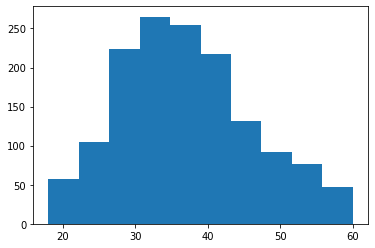

In [148]:
# A:
plt.hist(df.Age)

#### 5.B BoxPlot of Age

{'boxes': [<matplotlib.lines.Line2D at 0x7f40503f6ad0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f40503e17d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f40503e7e50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f40503e7a90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f40503e1990>,
  <matplotlib.lines.Line2D at 0x7f40503e1510>]}

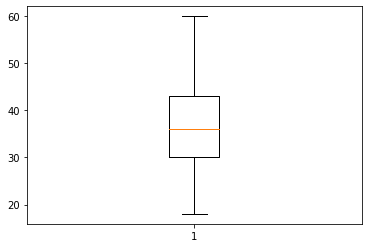

In [149]:
# A:
plt.boxplot(df.Age)

#### 5.C Scatterplot of age and length_of_service

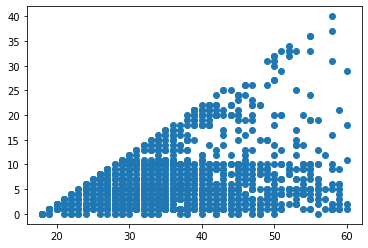

In [150]:
# A:
plt.scatter(df.Age, df.YearsAtCompany)

#### 5.D Plot Histogram of store_name

(array([326., 292., 259., 145.,   0., 131., 102.,  83.,  80.,  52.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

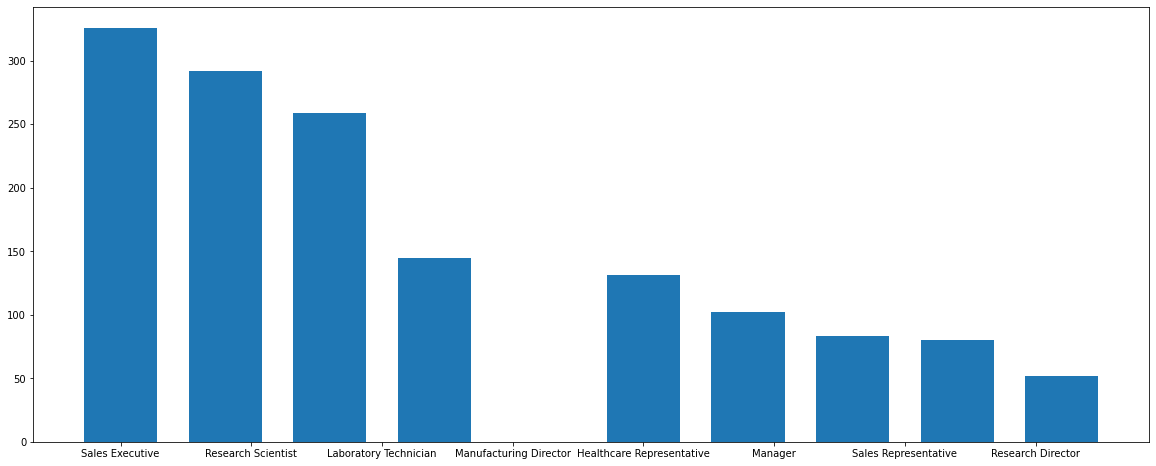

In [165]:
# A:
### no store name, plot histogram of JobRole instead
plt.figure(figsize=(20,8))
plt.hist(df.JobRole, align = 'left', rwidth=0.7)

#### 5.E Print Statistical Summary of Age

In [169]:
# A:
df.Age.describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



